<a href="https://colab.research.google.com/github/justinpinkney/clip2latent/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/justinpinkney/clip2latent.git
%cd clip2latent

In [ ]:
!pip install -r requirements-colab.txt

In [7]:
import torch
from clip2latent import models
from PIL import Image

device = "cuda"
model_choices = {
    "faces": {
        "checkpoint": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/ffhq-sg2-510.ckpt",
        "config": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/ffhq-sg2-510.yaml",
        },
    "landscape": {
        "checkpoint": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/lhq-sg3-410.ckpt",
        "config": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/lhq-sg3-410.yaml",
    }
}

In [8]:
@torch.no_grad()
def infer(model, prompt, n_samples, scale, skips=250):
    images, clip_score = model(prompt, n_samples_per_txt=n_samples, cond_scale=scale, skips=skips, clip_sort=True)
    images = images.cpu()
    make_im = lambda x: (255*x.clamp(-1, 1)/2 + 127.5).to(torch.uint8).permute(1,2,0).numpy()
    images = [Image.fromarray(make_im(x)) for x in images]
    return images, clip_score

chosen_model = "faces"
checkpoint = model_choices[chosen_model]["checkpoint"]
cfg_file = model_choices[chosen_model]["config"]
model = models.Clip2StyleGAN(cfg_file, device, checkpoint)

100%|████████████████████████████████████████| 354M/354M [00:02<00:00, 129MiB/s]
Downloading: "https://huggingface.co/lambdalabs/clip2latent/resolve/main/ffhq-sg2-510.ckpt" to /root/.cache/torch/hub/checkpoints/ffhq-sg2-510.ckpt


  0%|          | 0.00/373M [00:00<?, ?B/s]

In [9]:
outputs, clip_score = infer(model, 'a photograph of a happy person wearing sunglasses by the sea', 2, 2)

sampling loop time step: 100%|██████████| 4/4 [00:00<00:00, 20.55it/s]


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


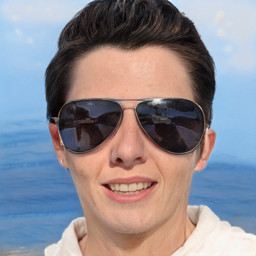

CLIP similarity score = 0.34112003445625305


In [10]:
display(outputs[0].resize((256, 256)))
print(f"CLIP similarity score = {clip_score[0].item()}")